https://towardsdatascience.com/cifar-100-transfer-learning-using-efficientnet-ed3ed7b89af2

In [1]:
import os
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model
from keras.metrics import top_k_categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator

2023-05-03 15:13:09.645215: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
TEST_PATH = "dataset/test/"
TEST_DIRS = glob.glob("dataset/test/*")

MODELS = ["sg-food-233-densenet121", "sg-food-233-densenet201", "sg-food-233-xception"]
CHECKPOINT_PATHS = ["checkpoints/" + MODEL + ".h5" for MODEL in MODELS]
MODEL_PATHS = ["models/" + MODEL + ".h5" for MODEL in MODELS]

In [3]:
def acc_top5(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

In [4]:
def load_models():
    loaded_models = []
    for CHECKPOINT_PATH in CHECKPOINT_PATHS:
        loaded_models.append(load_model(CHECKPOINT_PATH, custom_objects={"acc_top5": acc_top5}))
    print("Models Loaded")
    return loaded_models

In [5]:
models = load_models()

2023-05-03 15:13:15.465090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Models Loaded


In [6]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_data = test_datagen.flow_from_directory(
    TEST_PATH,
    batch_size=1,
    shuffle=False,
    target_size=(512, 512),
    class_mode="categorical")
filenames = test_data.filenames

Found 10700 images belonging to 233 classes.


In [7]:
def evaluate(model):
    test_score = model.evaluate(test_data)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])
    print("Test Accuracy Top 5: ", test_score[2])

In [8]:
for i, model in enumerate(models):
    print("=" * 100)
    print(MODELS[i])
    evaluate(model)
    print("=" * 100)

sg-food-233-densenet121
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. 

In [9]:
def predict(model):
    predicted_class_indices = []

    with tqdm(total=len(test_data.filepaths)) as pbar:
        for i, filepath in enumerate(test_data.filepaths):
            pbar.set_description("Predicting: %d" % (1 + i))
            pbar.update(1)
            test_image = load_img(filepath, target_size=(512, 512))
            test_image_array = img_to_array(test_image)
            test_image_array = np.expand_dims(test_image_array, axis=0)
            test_image_array = test_image_array / 255.
            prediction = model.predict(test_image_array, verbose=0)
            predicted_label = np.argmax(prediction)
            predicted_class_indices.append(predicted_label)
    
    predicted_class_indices = np.asarray(predicted_class_indices)

    predicted_classnames = []
    true_classnames = []
    for i in range(len(filenames)):
        predicted_classnames.append(list(test_data.class_indices.keys())[predicted_class_indices.item(i)])
        true_classnames.append(list(test_data.class_indices.keys())[test_data.labels[i]])
    return pd.DataFrame({"Filename": filenames, "Prediction": predicted_classnames, "True": true_classnames})

In [10]:
results = []
for model in models:
    results.append(predict(model))

Predicting: 1:   0%|                                  | 0/10700 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Predicting: 1:   0%|                                  | 0/10700 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Predicting: 1:   0%|                                  | 0/10700 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Predicting: 10700: 100%|████████████████| 10700/10700 [1:00:53<00:00,  2.93it/s]


In [11]:
mismatched_results = []
for i, result in enumerate(results):
    test_accuracy = result.loc[(result["Prediction"] == result["True"])].shape[0] / result.shape[0]
    mismatched_result = result.loc[~(result["Prediction"] == result["True"])]
    mismatched_results.append(mismatched_result)
    print(MODELS[i] + ": " + "Test Accuracy: " + str(test_accuracy) + ", Mismatch: " + str(len(mismatched_result)))

sg-food-233-densenet121: Test Accuracy: 0.6870093457943925, Mismatch: 3349
sg-food-233-densenet201: Test Accuracy: 0.7029906542056075, Mismatch: 3178
sg-food-233-xception: Test Accuracy: 0.6908411214953271, Mismatch: 3308


In [12]:
results[0].sample(10)

,Filename,Prediction,True
206,"Bee hoon, goreng/EW93YCU3P2LQC1LKUZXJ7APS.jpg",Mee goreng,"Bee hoon, goreng"
8470,popcorn/HTFYTHJ52TARFGS42K0UDB0U.jpg,popcorn,popcorn
1848,Lor mee/9P5YVQ18Y560OUC4LZS5PPJF.jpg,Lor mee,Lor mee
6366,hokkien prawn mee/U5ZYZC6VKH5LFPDVVPX3B7UO.jpg,hokkien prawn mee,hokkien prawn mee
6350,hokkien prawn mee/HX3O3RCP5Z0NRGCI8GO3B4IF.jpg,"Bee hoon, soto",hokkien prawn mee
903,Cucumber/V05Y4OYK9QQZ3KOXRV7VH6CZ.jpg,Cucumber,Cucumber
7875,pancake/9O31H7JB5UMY1U58QJ5302B2.jpg,pancake,pancake
1627,Kopi Teh Milo/VV91W852E8630GT5AFD98I1R.jpg,Bubble Milk Tea,Kopi Teh Milo
9425,sirloin steak/RIXZE6SPVT35FW3OB5WNOXU9.jpg,sirloin steak,sirloin steak
9589,steamed buns/1VB40RK6CVCU55K61ZZAYZ7J.jpg,xiao long bao,steamed buns


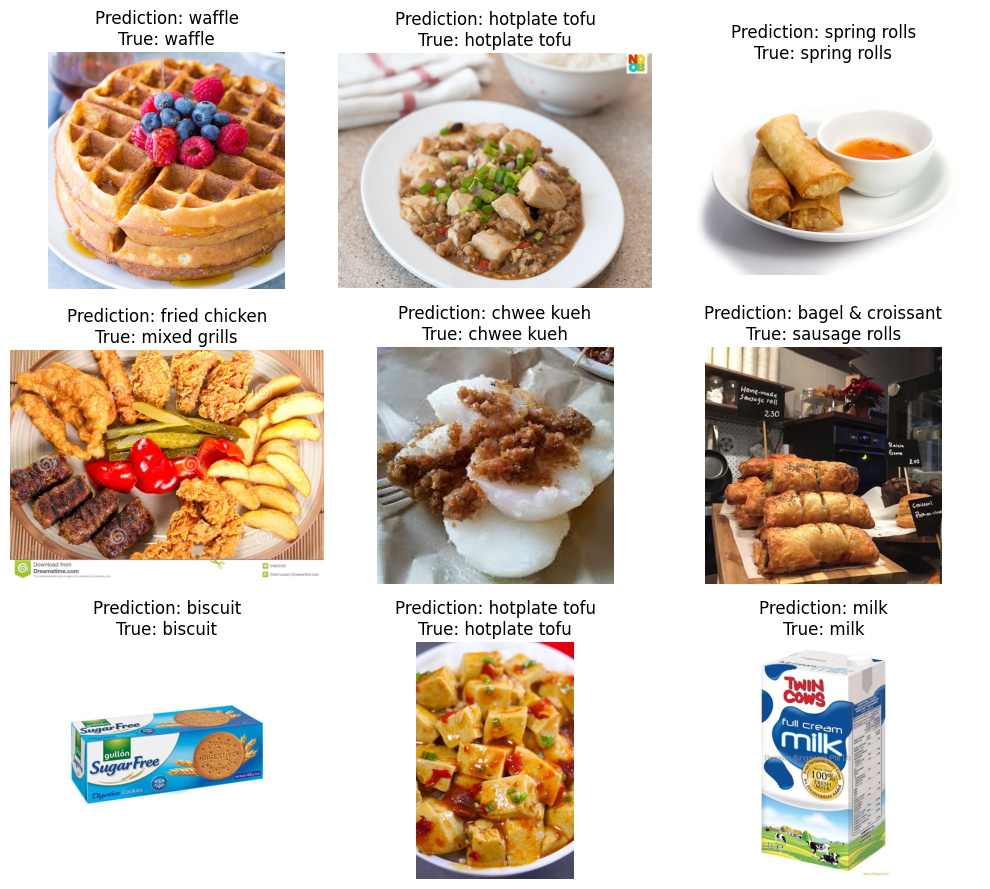

In [13]:
plt.figure(figsize=(10, 9))

for idx, row in results[0].sample(9).reset_index(drop=True).iterrows():
    plt.subplot(3, 3, idx + 1)
    img = plt.imread(TEST_PATH + row["Filename"])
    plt.title("Prediction: " + row["Prediction"] + "\nTrue: " + row["True"])
    plt.imshow(img, cmap="gray")
    plt.axis("off")

plt.tight_layout()

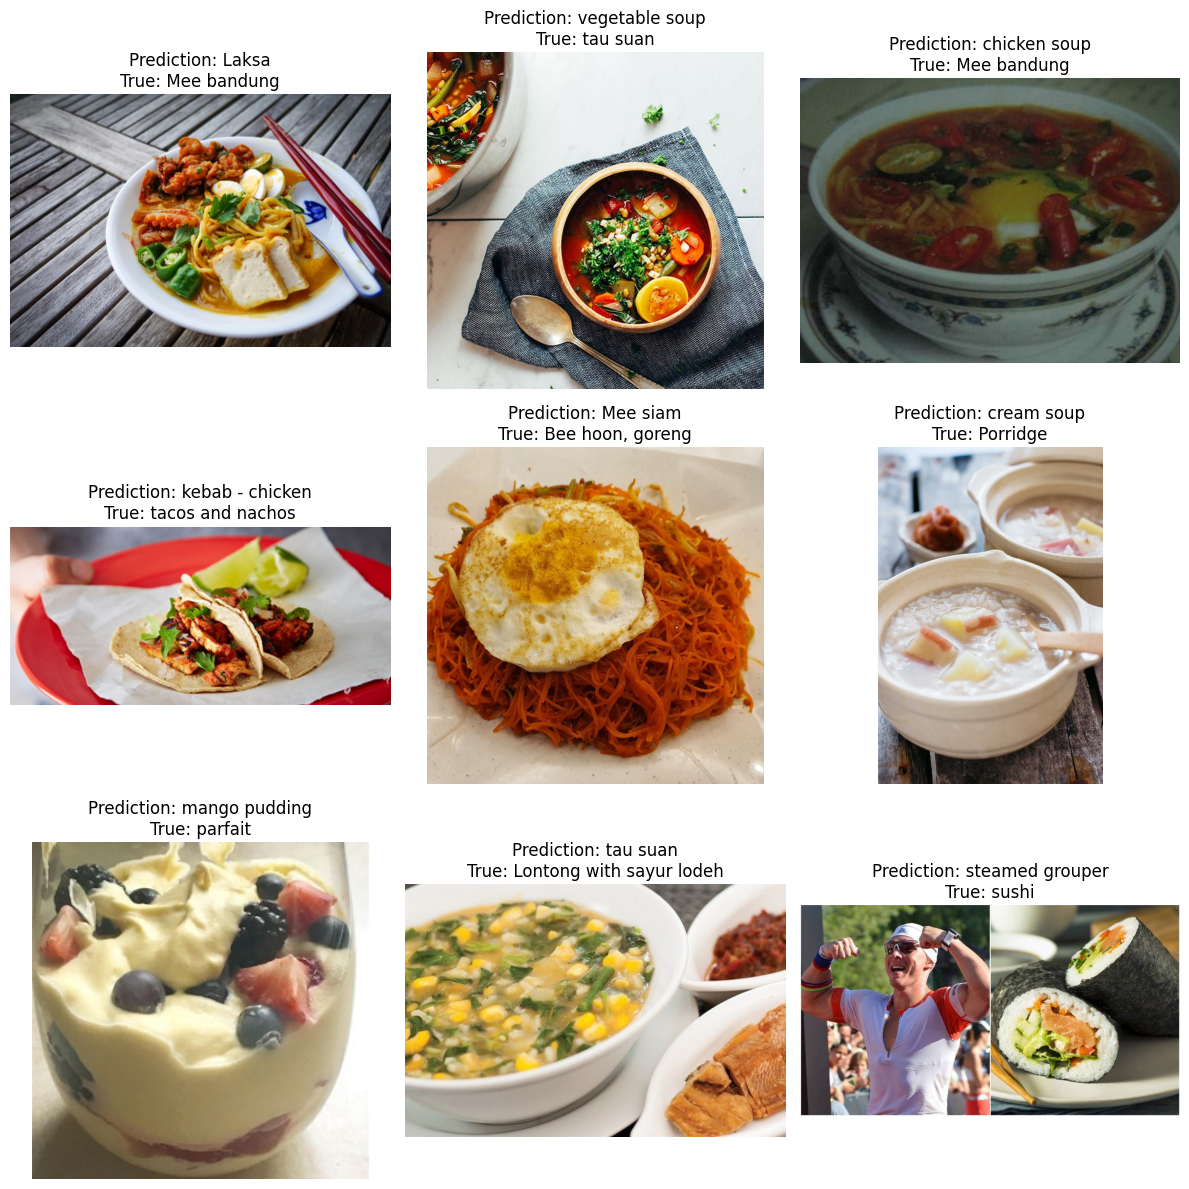

In [14]:
plt.figure(figsize=(12, 12))

for idx, row in mismatched_results[0].sample(9).reset_index(drop=True).iterrows():
    plt.subplot(3, 3, idx + 1)
    img = plt.imread(TEST_PATH + row["Filename"])
    plt.title("Prediction: " + row["Prediction"] + "\nTrue: " + row["True"])
    plt.imshow(img, cmap="gray")
    plt.axis("off")

plt.tight_layout()

In [15]:
ensemble_result = {}
for i, result in enumerate(results):
    ensemble_result[i] = result["Prediction"]
ensemble_result["True"] = results[0]["True"]
ensemble_result = pd.DataFrame(ensemble_result)
ensemble_result.sample(10)

,0,1,2,True
2899,Seafood Noodles Soup,chicken soup,Seafood Noodles Soup,Seafood Noodles Soup
4367,blueberries,blueberries,blueberries,blueberries
168,green leafy vegetables,Barley,Barley,Barley
3121,chicken rice,chicken rice,chicken rice,Soto ayam
6364,hokkien prawn mee,hokkien prawn mee,hokkien prawn mee,hokkien prawn mee
3238,Sweets,Sweets,Sweets,Sweets
6418,hotplate tofu,hotplate tofu,hotplate tofu,hotplate tofu
9924,tau suan,tau suan,baked beans,tau suan
6524,ice kacang,ice kacang,ice kacang,ice kacang
7569,muesli,muesli,muesli,muesli


In [16]:
def get_ensemble_result():
    truth = 0
    for index, row in ensemble_result.iterrows():
        predictions = list(row)[:-1]
        prediction = max(set(predictions), key=predictions.count)
        label = list(row)[-1:][0]
        if prediction == label:
            truth += 1
    return truth / ensemble_result.shape[0]

In [17]:
print("Ensemble Test Accuracy: " + str(get_ensemble_result()))

Ensemble Test Accuracy: 0.7285046728971962
